## Time Series Analysis for Rose Wine

### 1.Read the data as an appropriate Time Series data and plot the data.

In [1130]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [1131]:
df_rose = pd.read_csv("Rose.csv")

In [1132]:
df_rose.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [1133]:
df_rose.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [1134]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [1135]:
df_rose['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_rose.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [1136]:
df_rose = df_rose.set_index('Time_Stamp')
df_rose.drop(['YearMonth'], axis=1, inplace=True)
df_rose.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


#### Missing Value Handling

In [1137]:
df_rose.isna().sum()

Rose    2
dtype: int64

In [1138]:
df_rose.interpolate(method='spline',order=3,inplace=True)

In [1139]:
df_rose.isna().sum()

Rose    0
dtype: int64

In [1140]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

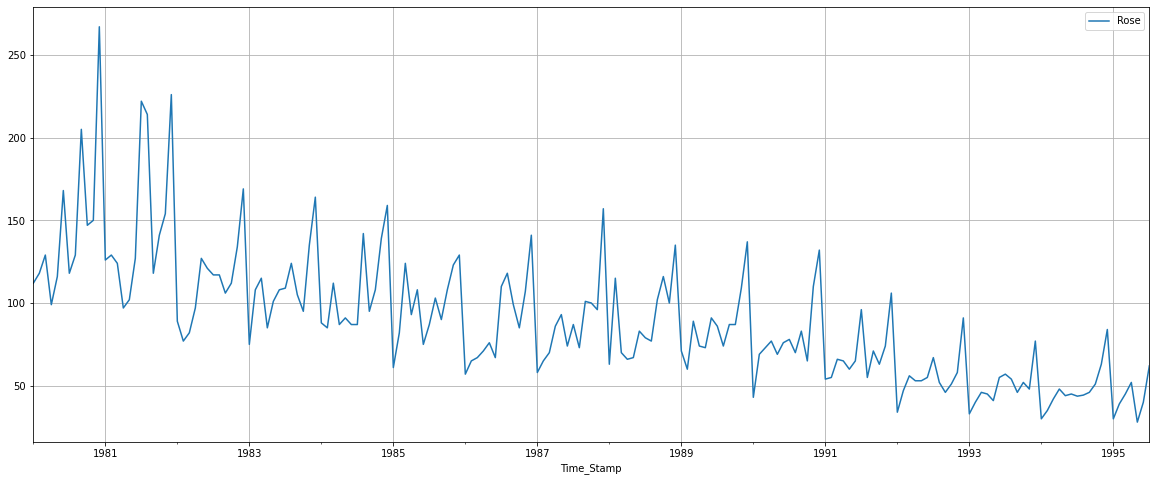

In [1141]:
df_rose.plot()
plt.grid();

### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Find the mean and median of the monthly wine sales.

In [1142]:
df_rose.describe().T

,count,mean,std,min,25%,50%,75%,max
Rose,187.0,89.898502,39.256767,28.0,62.5,85.0,111.0,267.0


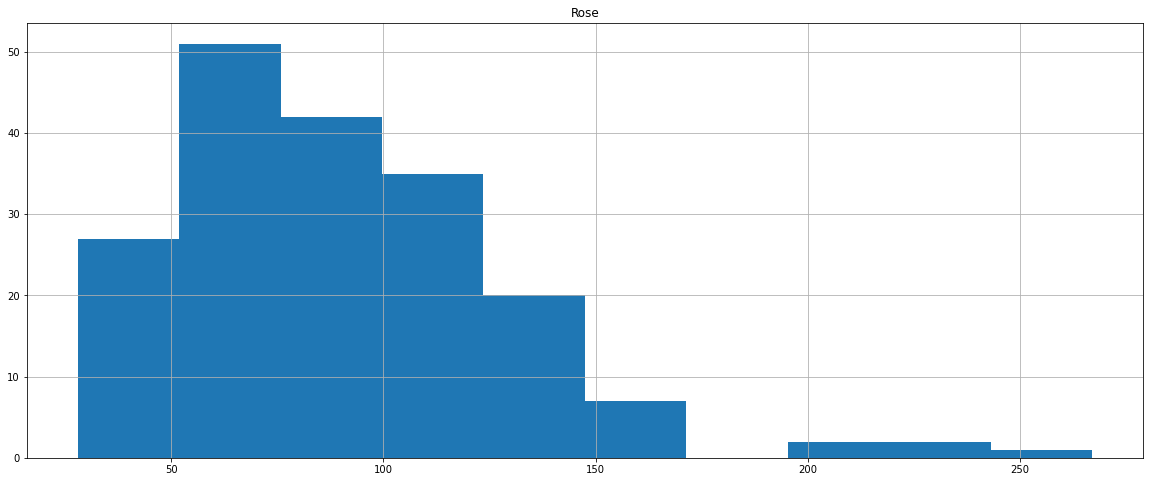

In [1143]:
df_rose.hist()
plt.show()

#### Plot a year on year boxplot for the wine sales.

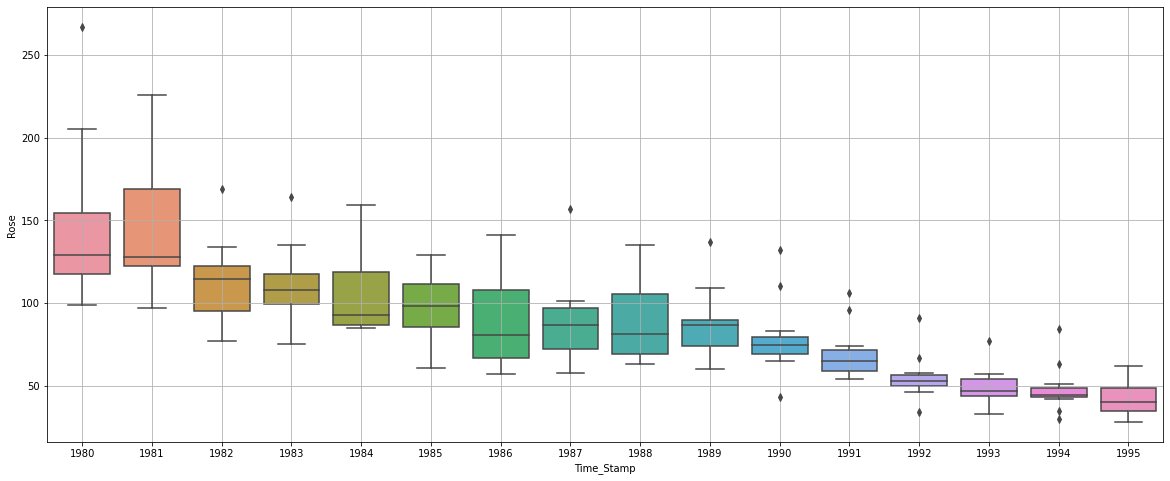

In [1144]:
sns.boxplot(x = df_rose.index.year,y = df_rose['Rose'])
plt.grid();

#### Monthly Plot

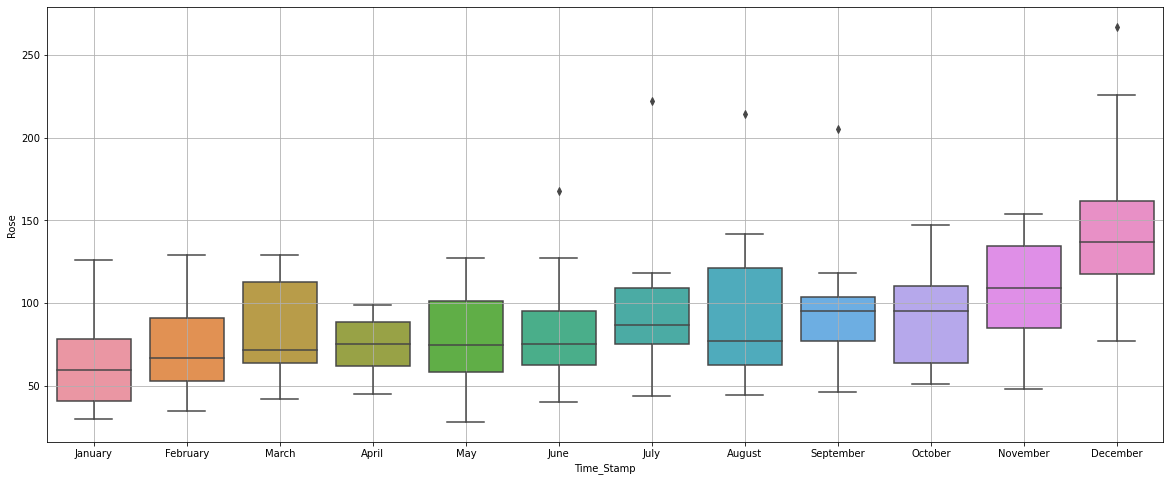

In [1145]:
sns.boxplot(x = df_rose.index.month_name(),y = df_rose['Rose'])
plt.grid();

#### Plot a graph of monthly sales across years.

In [1181]:
monthly_sales_across_years = pd.pivot_table(df_rose, values = 'Rose', columns = df_rose.index.year, index = df_rose.index.month)
monthly_sales_across_years

Time_Stamp,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Time_Stamp,,,,,,,,,,,,,,,,
1,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.000000,30.0
2,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.000000,39.0
3,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.000000,45.0
4,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.000000,52.0
5,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.000000,28.0
6,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.000000,40.0
7,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,43.693064,62.0
8,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,44.326877,NaN
9,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.000000,NaN


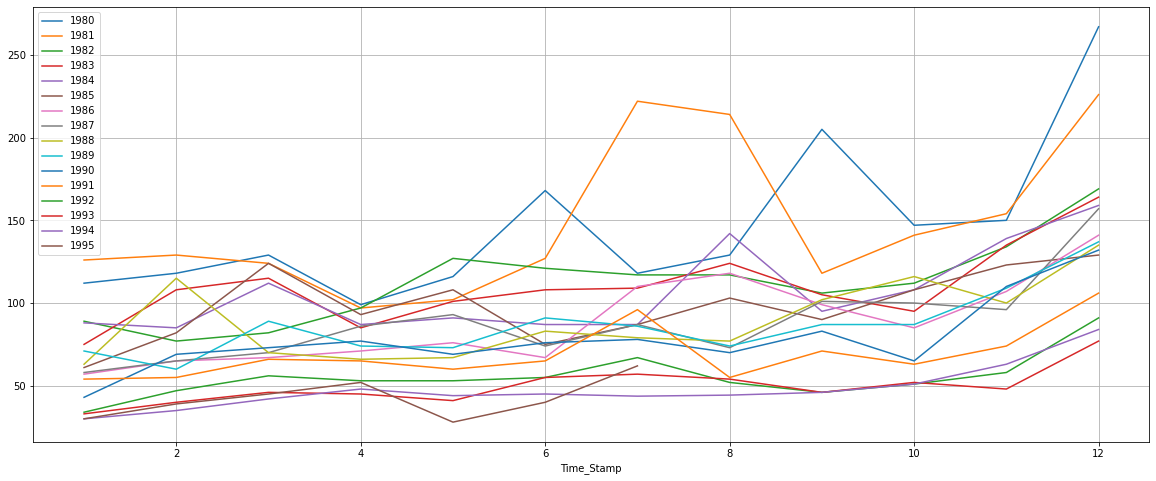

In [1182]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution.

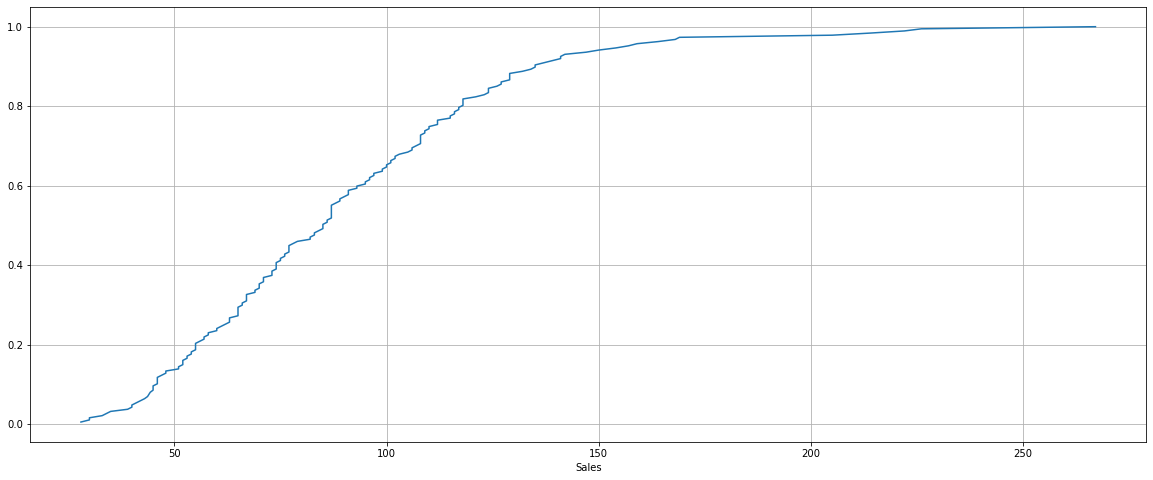

In [1148]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

cdf = ECDF(df_rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average sales per month and the month on month percentage change of sales.

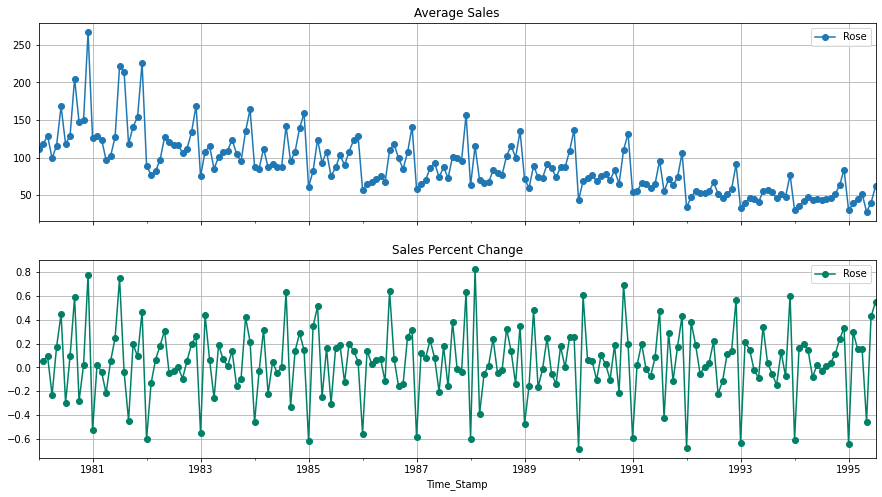

In [1149]:
# group by date and get average RetailSales, and precent change
average    = df_rose.groupby(df_rose.index)["Rose"].mean()
pct_change = df_rose.groupby(df_rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

#### Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

#### Yearly Plot

In [1150]:
df_yearly_sum = df_rose.resample('A').sum()
df_yearly_sum.head()

,Rose
Time_Stamp,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


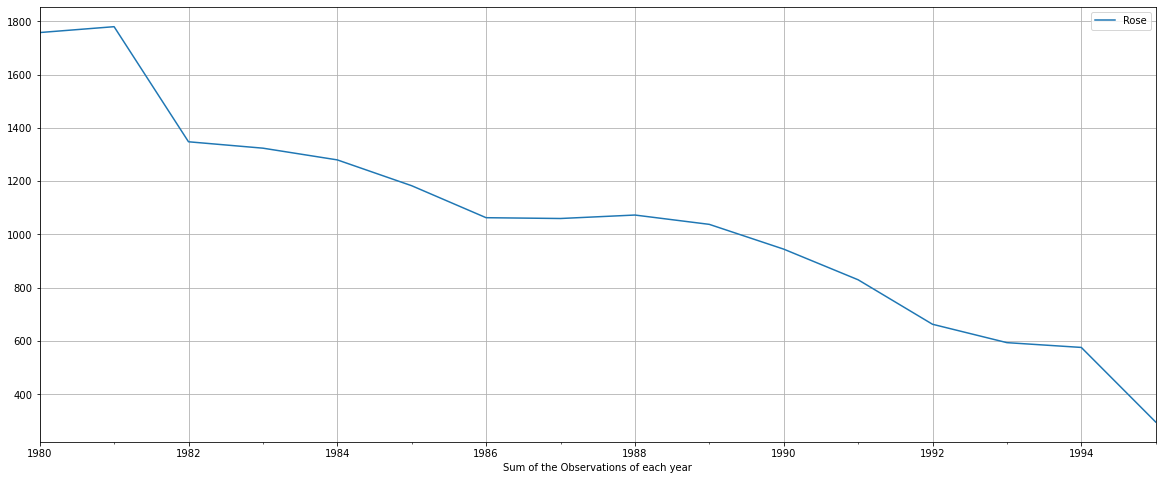

In [1151]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

#### Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [1152]:
df_yearly_mean = df_rose.resample('Y').mean()
df_yearly_mean.head()

,Rose
Time_Stamp,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


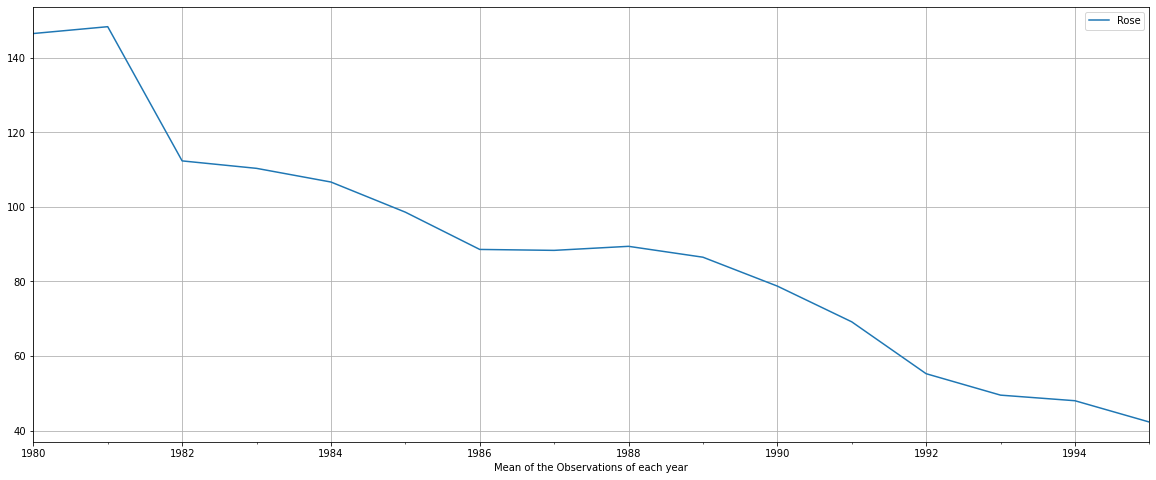

In [1153]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

#### Quarterly Plot

In [1154]:
df_quarterly_sum = df_rose.resample('Q').sum()
df_quarterly_sum.head()

,Rose
Time_Stamp,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0


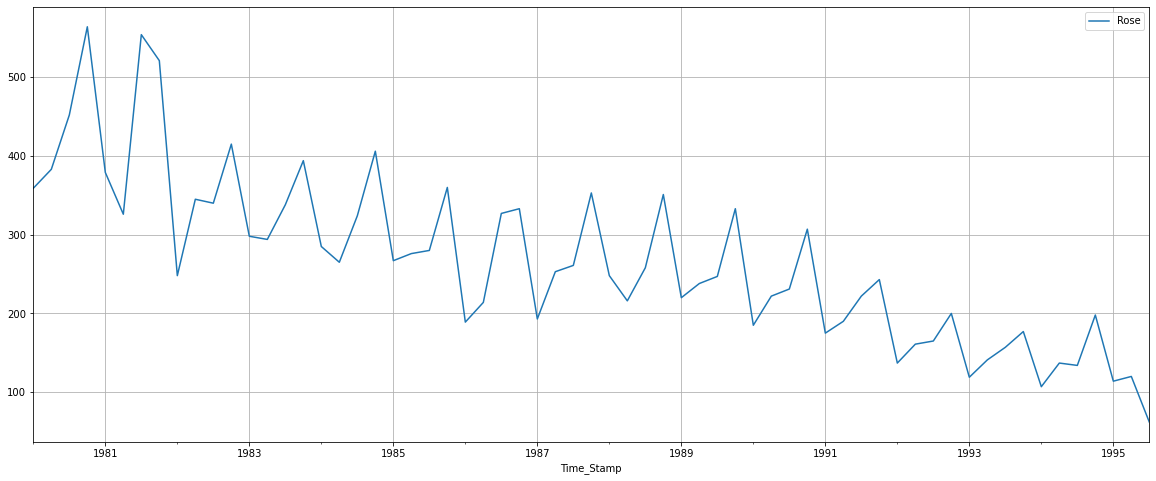

In [1155]:
df_quarterly_sum.plot();
plt.grid()

In [1156]:
df_quarterly_mean = df_rose.resample('Q').mean()
df_quarterly_mean.head()

,Rose
Time_Stamp,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333


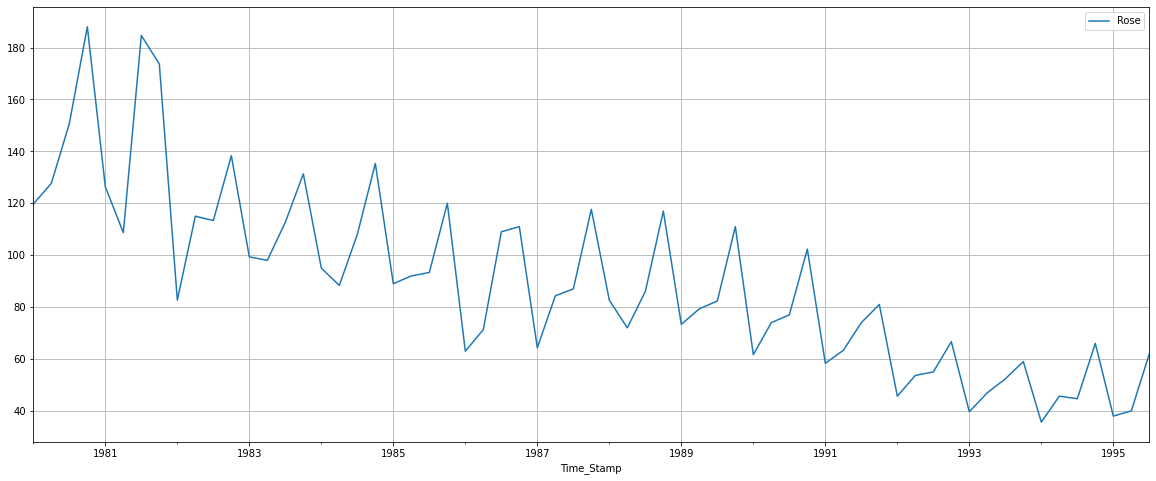

In [1157]:
df_quarterly_mean.plot();
plt.grid()

#### Daily Plot

In [1158]:
df_daily_sum = df_rose.resample('D').sum()
df_daily_sum

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-01,0.0
1980-02-02,0.0
1980-02-03,0.0
1980-02-04,0.0
...,...
1995-07-27,0.0
1995-07-28,0.0
1995-07-29,0.0


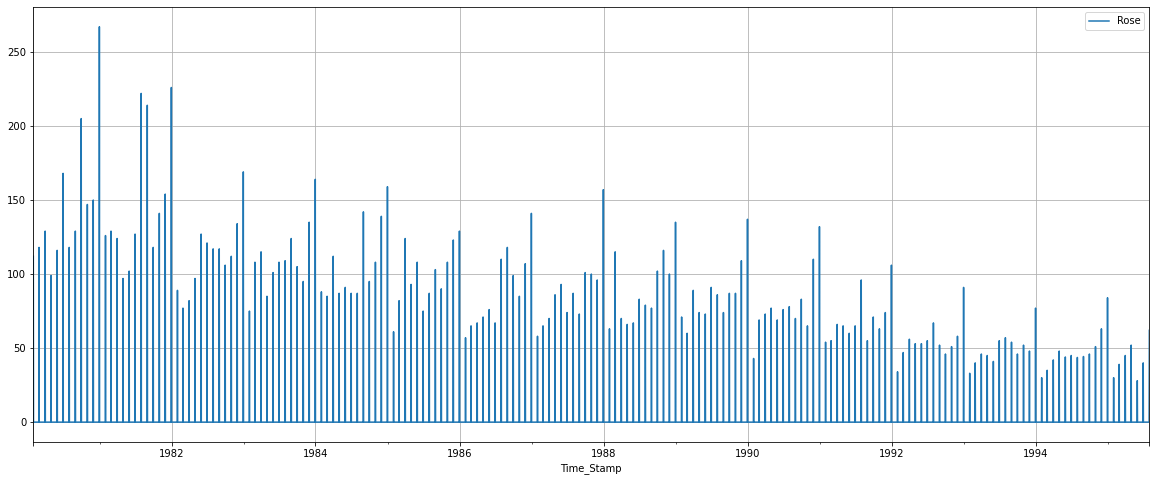

In [1159]:
df_daily_sum.plot()
plt.grid();

#### Decade Plot

In [1160]:
df_decade_sum = df_rose.resample('10Y').sum()
df_decade_sum

,Rose
Time_Stamp,
1980-12-31,1758.000000
1990-12-31,12094.000000
2000-12-31,2959.019941


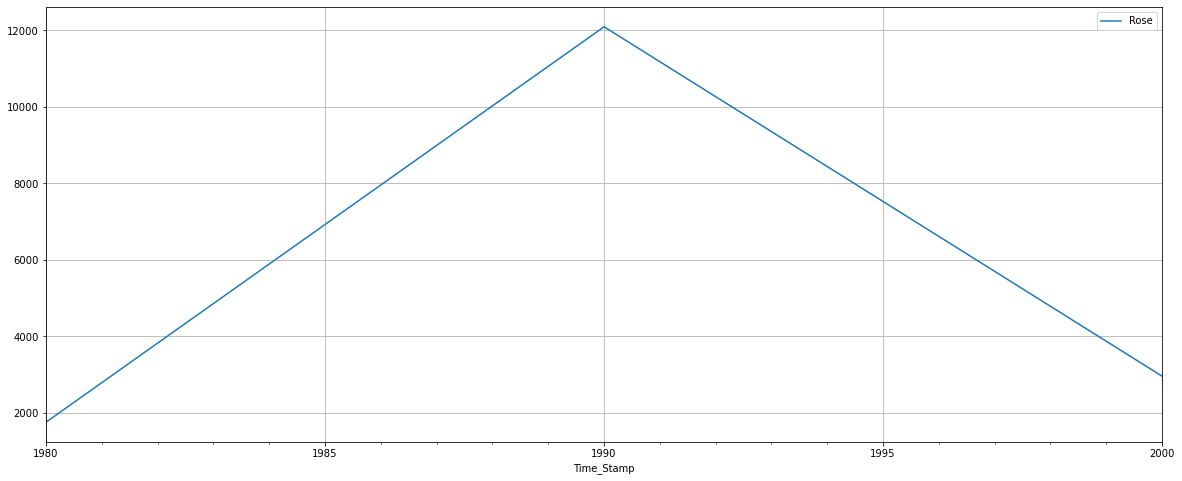

In [1161]:
df_decade_sum.plot();
plt.grid()

#### Decompose the Time Series and plot the different components.

In [1162]:
from statsmodels.tsa.seasonal import seasonal_decompose

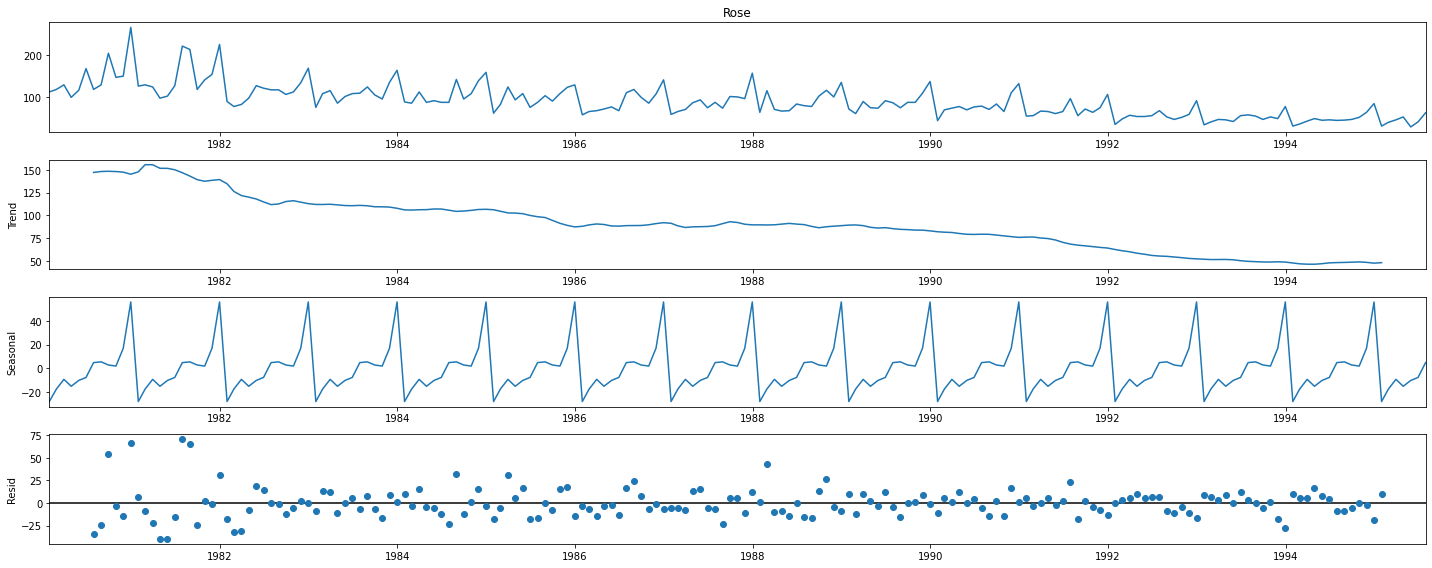

In [1163]:
decomposition = seasonal_decompose(df_rose.Rose,model='additive')
decomposition.plot();

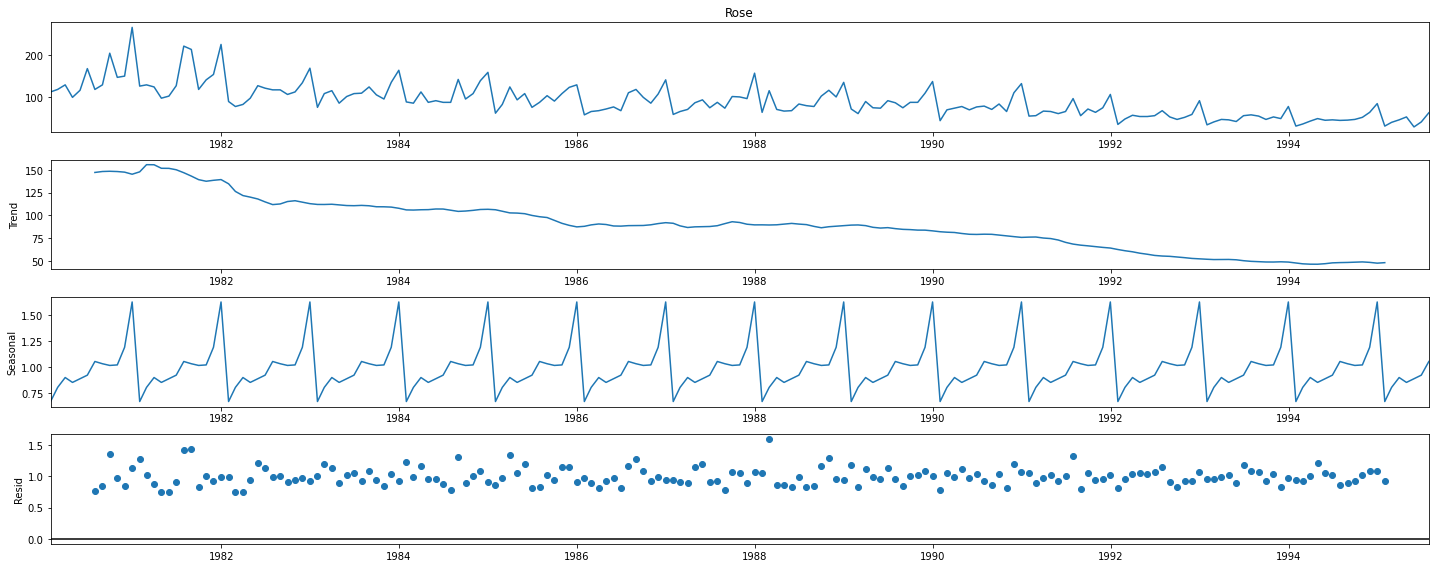

In [1164]:
decomposition = seasonal_decompose(df_rose.Rose,model='multiplicative')
decomposition.plot();

In [1165]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [1166]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670320
1980-02-29    0.806375
1980-03-31    0.901501
1980-04-30    0.854411
1980-05-31    0.889760
1980-06-30    0.924324
1980-07-31    1.056071
1980-08-31    1.034338
1980-09-30    1.017959
1980-10-31    1.022915
1980-11-30    1.192781
1980-12-31    1.629244
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.759671
1980-08-31    0.841974
1980-09-30    1.357259
1980-10-31    0.970446
1980-11-30    0.853069
1980-12-31    1.129231
Name: resid, dtype:

In [1167]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.843004
1980-08-31    148.966974
1980-09-30    149.732259
1980-10-31    149.053780
1980-11-30    148.269735
1980-12-31    146.254231
dtype: float64

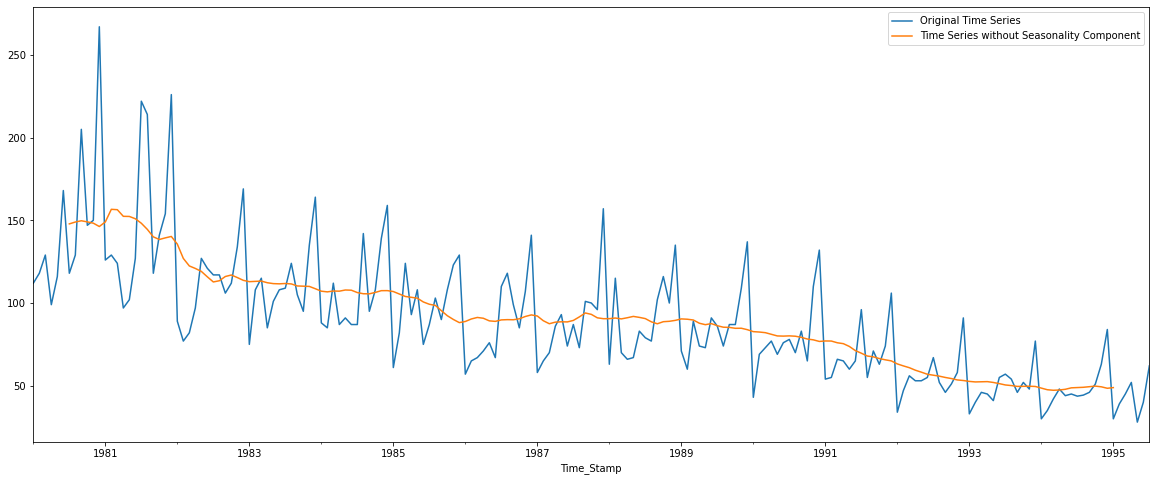

In [1168]:
df_rose.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

#### 3.Split the data into training and test. The test data should start in 1991.

In [1169]:
train=df_rose[df_rose.index.year < 1991]
test=df_rose[df_rose.index.year >= 1991]

In [1170]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [1171]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [1172]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


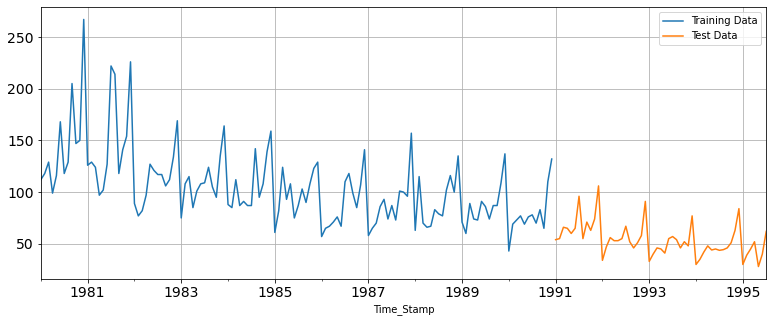

In [1173]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

#### 4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
####  Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data               and check the performance on the test data using RMSE.

#### Building different models and comparing the accuracy metrics.

#### Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [1174]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [1175]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [1176]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [1177]:
from sklearn.linear_model import LinearRegression

In [1178]:
lr = LinearRegression()

In [1179]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

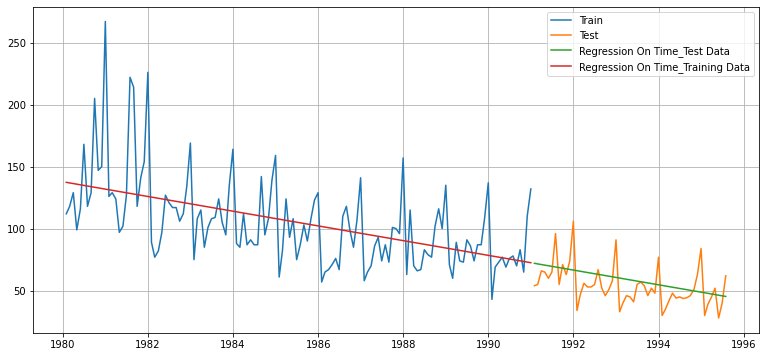

In [1180]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [870]:
from sklearn import metrics

In [871]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

### Model Evaluation

In [872]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 30.718 MAPE is 21.22


In [873]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.487 MAPE is 91.84


In [874]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.486843,91.84


#### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [875]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [876]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [877]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

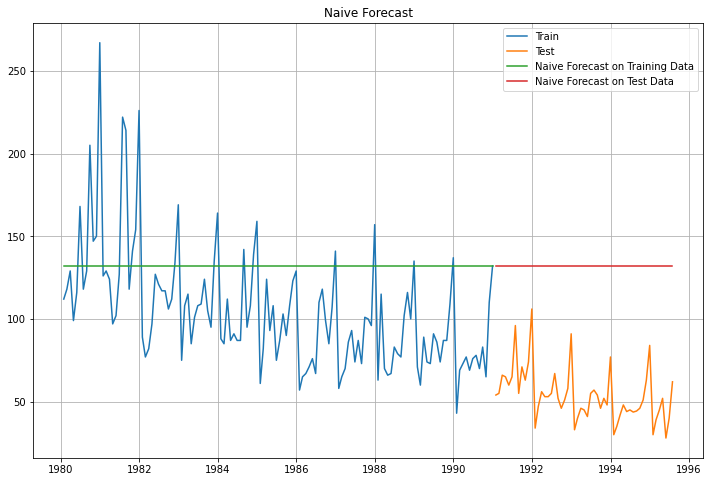

In [878]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [879]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 45.064 MAPE is 36.38


In [880]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.778 MAPE is 145.35


In [881]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.486843,91.84
NaiveModel,79.778066,145.35


#### Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [882]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [883]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

,Rose,mean_forecast
Time_Stamp,,
1980-01-31,112.0,104.939394
1980-02-29,118.0,104.939394
1980-03-31,129.0,104.939394
1980-04-30,99.0,104.939394
1980-05-31,116.0,104.939394


In [884]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


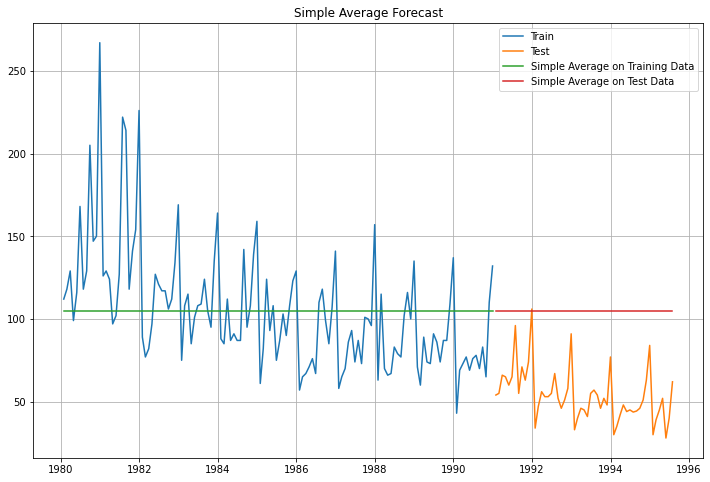

In [885]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [886]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [887]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.522 MAPE is 95.13


In [888]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.486843,91.84
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13


#### Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [889]:
MovingAverage = df_rose.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


#### Trailing moving averages

In [890]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


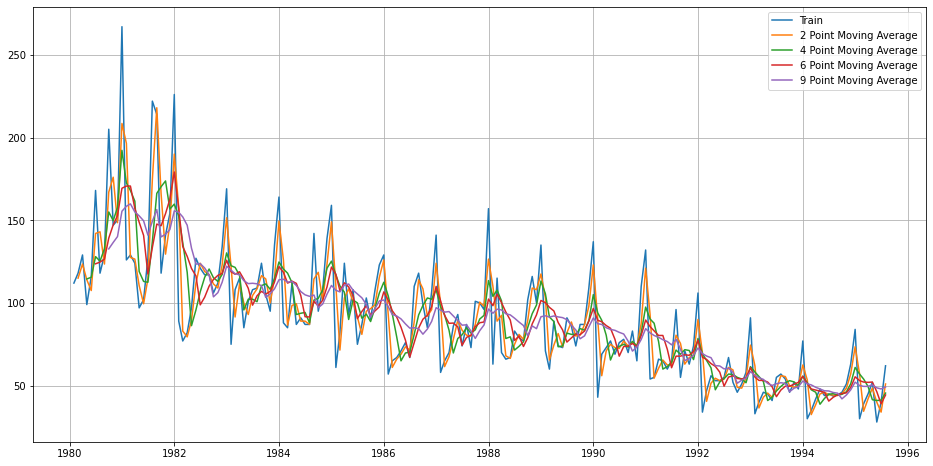

In [891]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [892]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

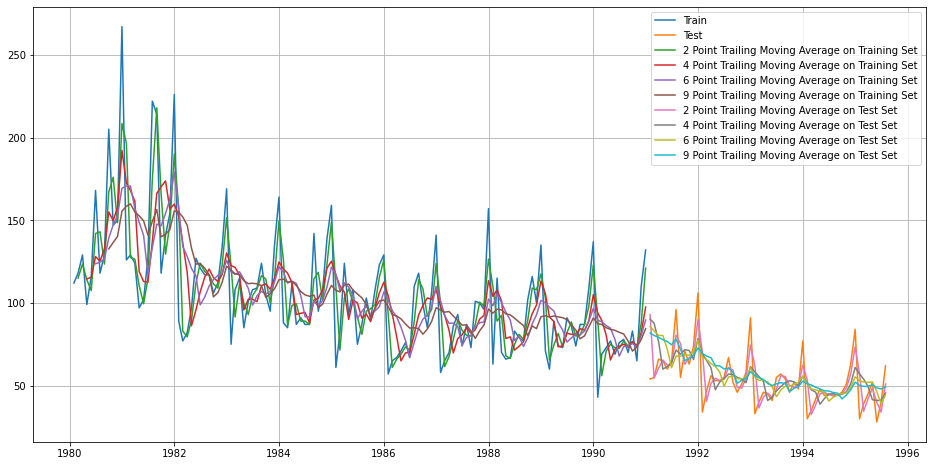

In [893]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

##### Done only on the test data.

In [894]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530 MAPE is 13.60
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.462 MAPE is 19.59
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.587 MAPE is 20.83
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.740 MAPE is 21.13


In [895]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.486843,91.84
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
2pointTrailingMovingAverage,11.530180,13.60
4pointTrailingMovingAverage,14.462330,19.59
6pointTrailingMovingAverage,14.586916,20.83
9pointTrailingMovingAverage,14.740112,21.13


#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

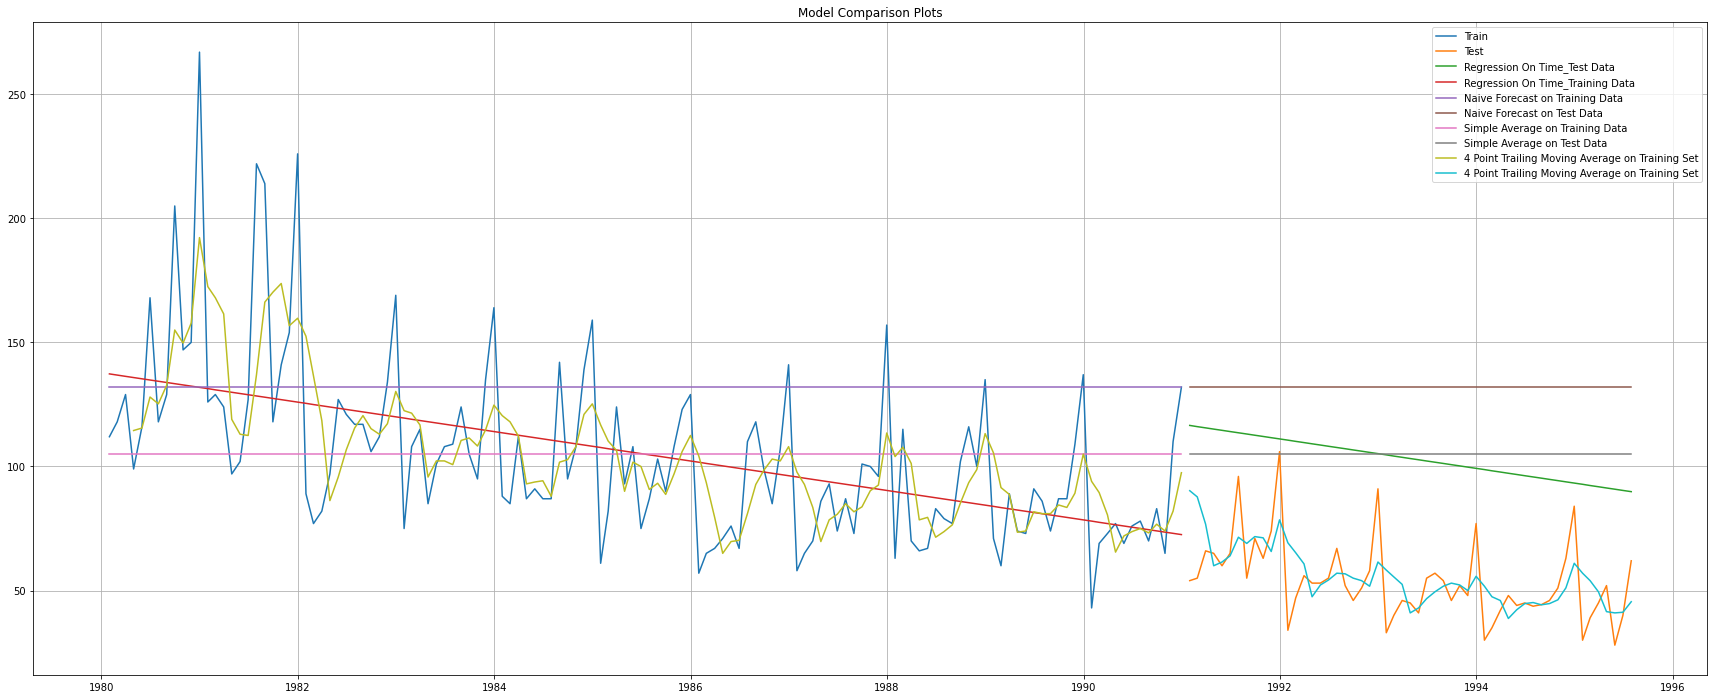

In [896]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### Method 5: Simple Exponential Smoothing

#### This code has been written in '0.11.1' version of 'statsmodels'

In [897]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [898]:
SES_train = train.copy()
SES_test = test.copy()

In [899]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [900]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [901]:
model_SES_autofit.params

{'smoothing_level': 0.09874995867958046,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38699135899094,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [902]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,Rose,predict
Time_Stamp,,
1980-01-31,112.0,134.386991
1980-02-29,118.0,132.176277
1980-03-31,129.0,130.776370
1980-04-30,99.0,130.600954
1980-05-31,116.0,127.480361


In [903]:
len(SES_test)

55

In [904]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.105001
1991-02-28,55.0,87.105001
1991-03-31,66.0,87.105001
1991-04-30,65.0,87.105001
1991-05-31,60.0,87.105001


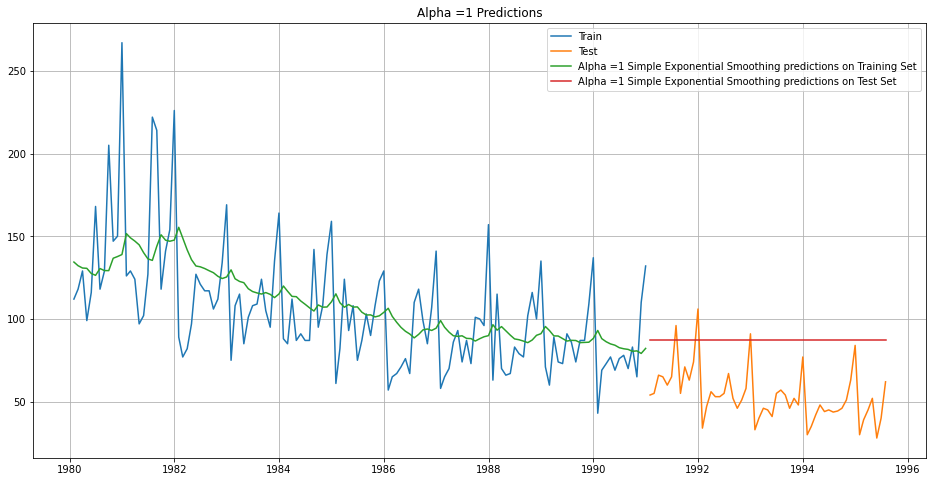

In [905]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

#### Model Evaluation for $\alpha$ = 1 : Simple Exponential Smoothing

In [906]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Rose'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 22.73


In [907]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 36.859 MAPE is 64.05


In [908]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.486843,91.84
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
2pointTrailingMovingAverage,11.530180,13.60
4pointTrailingMovingAverage,14.462330,19.59
6pointTrailingMovingAverage,14.586916,20.83
9pointTrailingMovingAverage,14.740112,21.13
"Alpha=1,SimpleExponentialSmoothing",36.858588,64.05


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [909]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [910]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

#### Model Evaluation

In [911]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,32.470164,22.31,47.566302,83.89
1,0.4,33.035130,22.50,53.828369,95.70
2,0.5,33.682839,22.68,59.702301,107.02
3,0.6,34.441171,22.88,65.031433,117.26
4,0.7,35.323261,23.08,69.758009,126.30
5,0.8,36.334596,23.41,73.833601,134.06
6,0.9,37.482782,23.93,77.198702,140.46


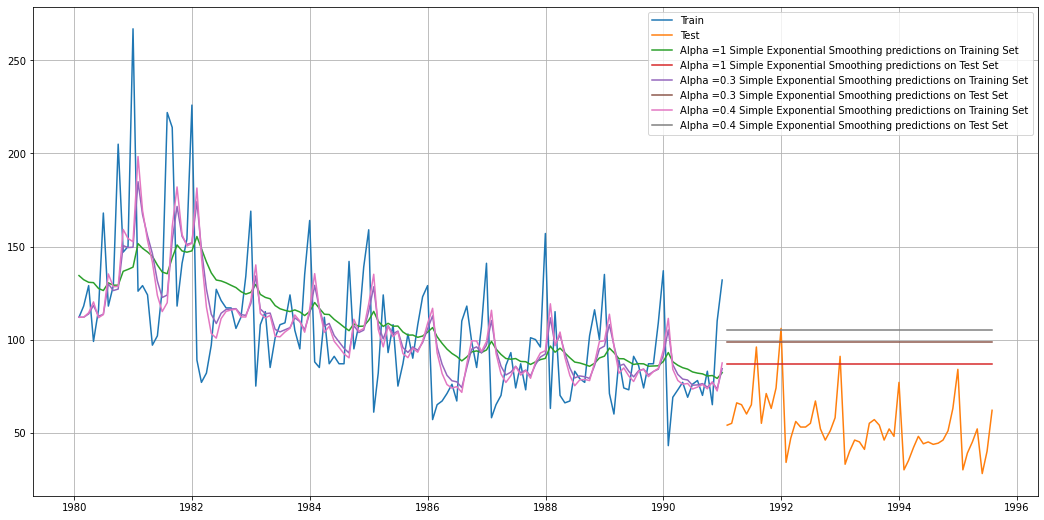

In [912]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [913]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.486843,91.84
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
2pointTrailingMovingAverage,11.530180,13.60
4pointTrailingMovingAverage,14.462330,19.59
6pointTrailingMovingAverage,14.586916,20.83
9pointTrailingMovingAverage,14.740112,21.13
"Alpha=1,SimpleExponentialSmoothing",36.858588,64.05
"Alpha=0.3,SimpleExponentialSmoothing",47.566302,83.89
"Alpha=0.4,SimpleExponentialSmoothing",53.828369,95.70


#### Method 6: Double Exponential Smoothing (Holt's Model)

#### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [914]:
DES_train = train.copy()
DES_test = test.copy()

In [915]:
model_DES = Holt(DES_train['Rose'])

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [916]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [917]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [918]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,25.48,265.639892,443.04
1,0.3,0.4,37.393239,26.53,358.823468,594.61
2,0.3,0.5,38.888325,27.54,451.882862,746.08
3,0.3,0.6,40.280670,28.63,537.026827,884.90
4,0.3,0.7,41.403518,29.56,601.689040,990.67
...,...,...,...,...,...,...
59,1.0,0.6,51.831610,34.67,801.752691,1325.29
60,1.0,0.7,54.497039,36.43,841.965081,1390.37
61,1.0,0.8,57.365879,38.27,854.038055,1409.91
62,1.0,0.9,60.474309,40.21,834.783438,1378.75


Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [919]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,25.48,265.639892,443.04
8,0.4,0.3,36.749123,25.55,339.378769,566.09
1,0.3,0.4,37.393239,26.53,358.823468,594.61
16,0.5,0.3,37.433314,25.46,394.344818,657.93
24,0.6,0.3,38.348984,25.60,439.368192,733.12


In [920]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,25.48,265.639892,443.04
8,0.4,0.3,36.749123,25.55,339.378769,566.09
1,0.3,0.4,37.393239,26.53,358.823468,594.61
16,0.5,0.3,37.433314,25.46,394.344818,657.93
9,0.4,0.4,38.004622,26.40,442.037999,733.10


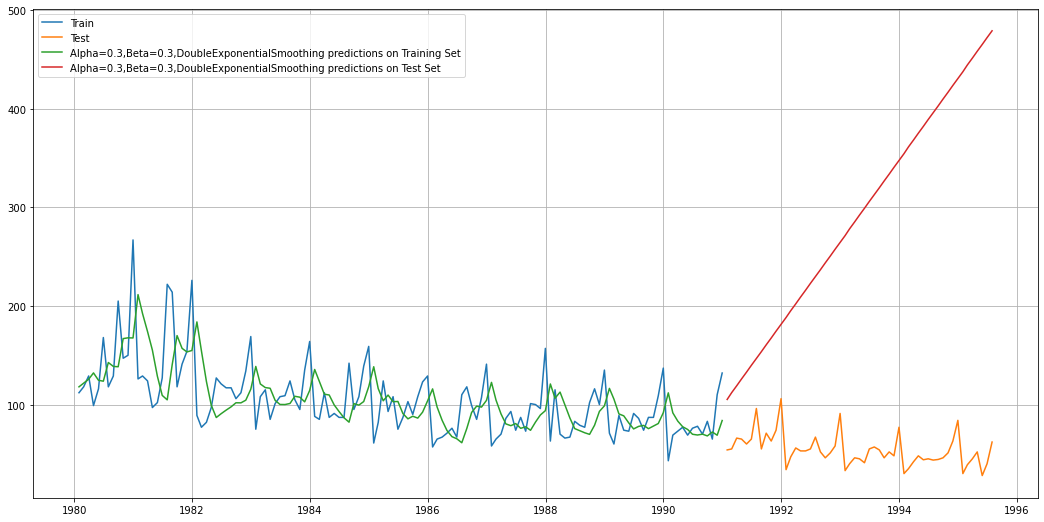

In [921]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [922]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.486843,91.84
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
2pointTrailingMovingAverage,11.530180,13.60
4pointTrailingMovingAverage,14.462330,19.59
6pointTrailingMovingAverage,14.586916,20.83
9pointTrailingMovingAverage,14.740112,21.13
"Alpha=1,SimpleExponentialSmoothing",36.858588,64.05
"Alpha=0.3,SimpleExponentialSmoothing",47.566302,83.89
"Alpha=0.4,SimpleExponentialSmoothing",53.828369,95.70


#### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [923]:
TES_train = train.copy()
TES_test = test.copy()

In [924]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [925]:
model_TES_autofit = model_TES.fit()

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [926]:
model_TES_autofit.params

{'smoothing_level': 0.10609618064451229,
 'smoothing_slope': 0.04843862120441897,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565260938652,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550324, 1.65927197, 1.805727  , 1.58888878, 1.77822773,
        1.92604444, 2.11649538, 2.25135281, 2.11690672, 2.08112911,
        2.40927381, 3.30448271]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [927]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
Time_Stamp,,
1980-01-31,112.0,113.105664
1980-02-29,118.0,127.054269
1980-03-31,129.0,137.165663
1980-04-30,99.0,119.844401
1980-05-31,116.0,131.432612


In [928]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.674341
1991-02-28,55.0,63.471274
1991-03-31,66.0,68.788791
1991-04-30,65.0,60.277827
1991-05-31,60.0,67.180383


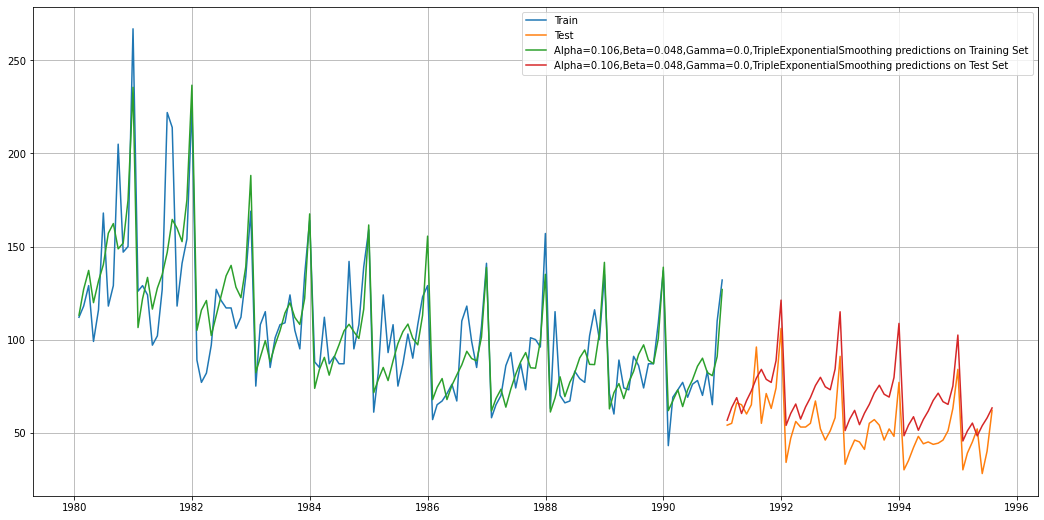

In [929]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [930]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print("For Alpha: 0.106,Beta: 0.048 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.106,Beta: 0.048 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.579 MAPE is 13.21


In [931]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha: 0.106,Beta: 0.048 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.106,Beta: 0.048 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.445 MAPE is 29.01


In [932]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha = 0 0.106,Beta = 0.048,Gamma = 0.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.486843,91.84
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
2pointTrailingMovingAverage,11.530180,13.60
4pointTrailingMovingAverage,14.462330,19.59
6pointTrailingMovingAverage,14.586916,20.83
9pointTrailingMovingAverage,14.740112,21.13
"Alpha=1,SimpleExponentialSmoothing",36.858588,64.05
"Alpha=0.3,SimpleExponentialSmoothing",47.566302,83.89
"Alpha=0.4,SimpleExponentialSmoothing",53.828369,95.70


In [933]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [934]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [935]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,27.217969,16.73,19.110845,30.79
1,0.3,0.3,0.4,27.399095,16.83,11.159462,14.93
2,0.3,0.3,0.5,27.928512,17.12,30.498636,45.10
3,0.3,0.3,0.6,28.888611,17.95,63.558390,98.63
4,0.3,0.3,0.7,30.568635,19.41,122.412736,191.25
...,...,...,...,...,...,...,...
507,1.0,1.0,0.6,28358.458519,3085.88,9603.641744,7820.66
508,1.0,1.0,0.7,30724.126331,4617.55,23029.955508,11848.08
509,1.0,1.0,0.8,1218.755446,493.75,9626.695041,8589.55
510,1.0,1.0,0.9,14150.253251,2303.41,9691.903861,7924.06


In [936]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
8,0.3,0.4,0.3,28.111886,17.08,10.966542,15.20
1,0.3,0.3,0.4,27.399095,16.83,11.159462,14.93
69,0.4,0.3,0.8,32.601491,19.30,12.614994,15.74
16,0.3,0.5,0.3,29.087520,17.50,14.361834,21.17
131,0.5,0.3,0.6,32.144773,18.75,16.673790,24.49


In [937]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
1,0.3,0.3,0.4,27.399095,16.83,11.159462,14.93
8,0.3,0.4,0.3,28.111886,17.08,10.966542,15.20
69,0.4,0.3,0.8,32.601491,19.30,12.614994,15.74
16,0.3,0.5,0.3,29.087520,17.50,14.361834,21.17
131,0.5,0.3,0.6,32.144773,18.75,16.673790,24.49


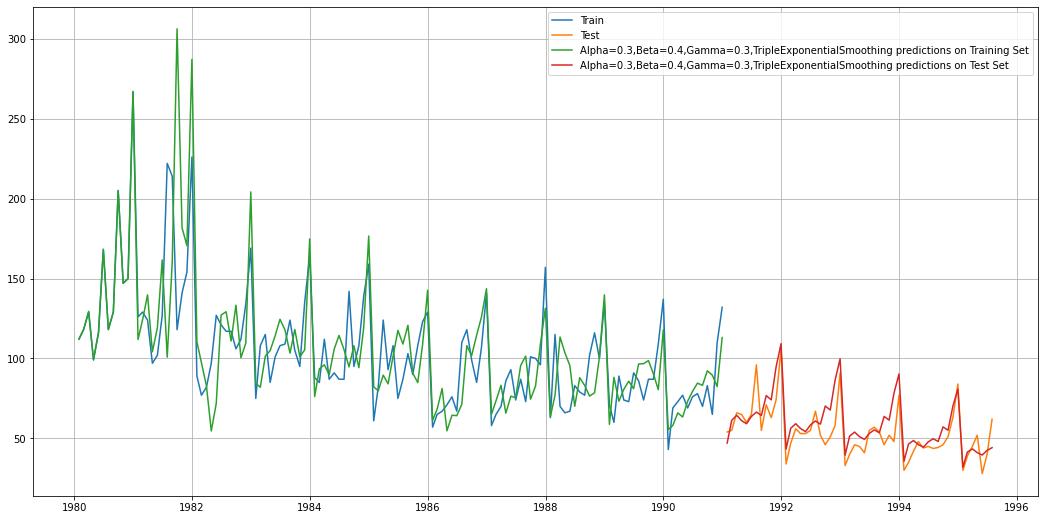

In [938]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [939]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][8]],'Test MAPE':[resultsDf_8_2['Test MAPE'][8]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.486843,91.84
NaiveModel,79.778066,145.35
SimpleAverageModel,53.521557,95.13
2pointTrailingMovingAverage,11.530180,13.60
4pointTrailingMovingAverage,14.462330,19.59
6pointTrailingMovingAverage,14.586916,20.83
9pointTrailingMovingAverage,14.740112,21.13
"Alpha=1,SimpleExponentialSmoothing",36.858588,64.05
"Alpha=0.3,SimpleExponentialSmoothing",47.566302,83.89
"Alpha=0.4,SimpleExponentialSmoothing",53.828369,95.70


In [940]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                      Test RMSE  Test MAPE
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.966542      15.20
2pointTrailingMovingAverage                          11.530180      13.60
4pointTrailingMovingAverage                          14.462330      19.59
6pointTrailingMovingAverage                          14.586916      20.83
9pointTrailingMovingAverage                          14.740112      21.13
Alpha = 0 0.106,Beta = 0.048,Gamma = 0.0,Triple...   17.445171      29.01
Alpha=1,SimpleExponentialSmoothing                   36.858588      64.05
Alpha=0.3,SimpleExponentialSmoothing                 47.566302      83.89
RegressionOnTime                                     51.486843      91.84
SimpleAverageModel                                   53.521557      95.13
Alpha=0.4,SimpleExponentialSmoothing                 53.828369      95.70
NaiveModel                                           79.778066     145

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gaves us the best accuracy (least RMSE and MAPE).

#### 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
#### Note: Stationarity should be checked at alpha = 0.05

#### Check for stationarity of the Training Data Time Series.

In [948]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

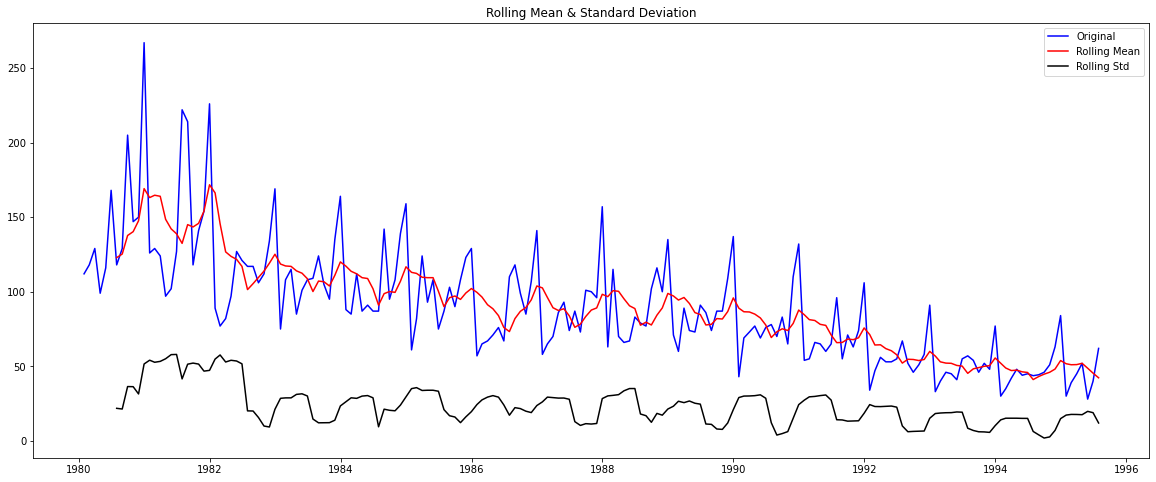

Results of Dickey-Fuller Test:
Test Statistic                  -1.873273
p-value                          0.344737
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [949]:
test_stationarity(df_rose['Rose'])

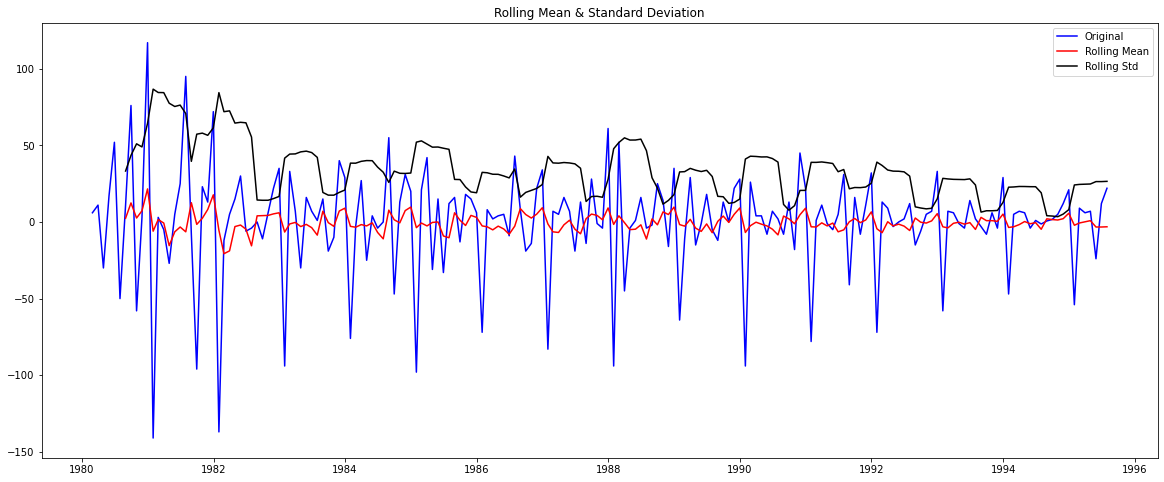

Results of Dickey-Fuller Test:
Test Statistic                -8.043385e+00
p-value                        1.821604e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [950]:
test_stationarity(df_rose['Rose'].diff().dropna())

#### 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Build an Automated version of a ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [1060]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [1061]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [1062]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.8353736830445
ARIMA(1, 1, 0) - AIC:1319.3483105806022
ARIMA(1, 1, 1) - AIC:1277.7757578817404
ARIMA(1, 1, 2) - AIC:1277.3592235584763
ARIMA(2, 1, 0) - AIC:1300.609261174395
ARIMA(2, 1, 1) - AIC:1279.045689409317
ARIMA(2, 1, 2) - AIC:1279.2986939364996


In [1063]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835374
5,"(1, 1, 2)",1277.359224
4,"(1, 1, 1)",1277.775758
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [1064]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sat, 12 Sep 2020   AIC                           1276.835
Time:                        18:10:39   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

#### Predict on the Test Set using this model and evaluate the model.

In [1065]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [1066]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.64081074461837


In [1067]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])
resultsDf

,RMSE
"ARIMA(2,1,2)",15.640811


#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

#### Let us look at the ACF plot to understand the seasonal parameter for the SARIMA model.

In [1068]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

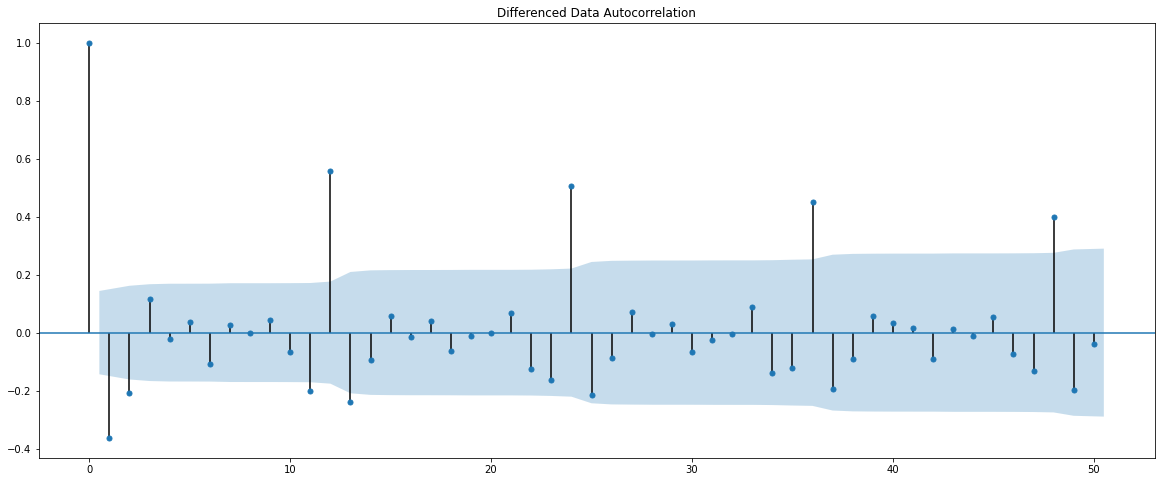

In [1069]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [1070]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [1071]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [1072]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:1264.4996261113854
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1144.7077471827372
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:1241.7870945149125
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1146.3093266722358
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1137.4533629515397
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1117.0224426218901
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:1263.536909738396
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:1201.383254802955
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1097.1908217752787
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:1222.4354735745042
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:1160.4386253746093
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1084.8564124348236
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1095.7490379982455
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1097.645518941754
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1053.0044082620363
SARIMA(0, 1, 

In [1073]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655818
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.230275
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


In [1074]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sat, 12 Sep 2020   AIC                           1041.656
Time:                                   18:10:59   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.899      0.000      -0.892      -0.295
ma.L1         -0.1954    514.994     -0.000

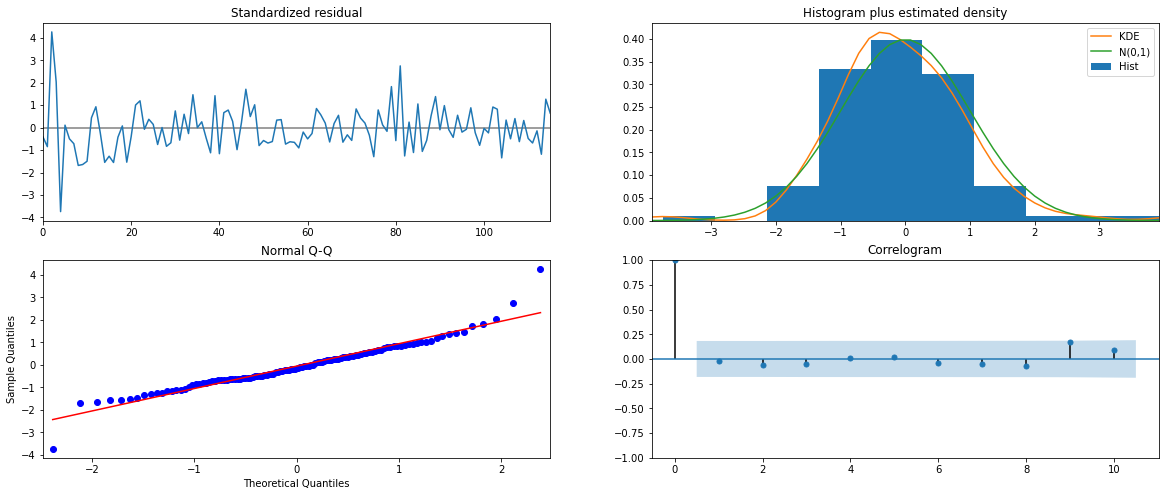

In [1075]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [1076]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [1077]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.841740,18.848058,25.900225,99.783255
1,67.630834,19.299885,29.803754,105.457914
2,74.746344,19.412447,36.698646,112.794041
3,71.325388,19.475399,33.154306,109.496469
4,76.016451,19.483680,37.829140,114.203761


In [1078]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

26.20844462758294


In [1079]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",15.640811
"SARIMA(1,1,2)(2,0,2,6)",26.208445


We did not see a gain in the RMSE value by including the seasonal parameters. In fact the RMSE detoriated a little.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [1080]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [1081]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [1082]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207239
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380891
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869387161
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.691363575317
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.879454069755
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.573540894576
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.536909738396
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:923.6314049383853
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.793632491793
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.7434330946066
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573483304561
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.5982866535995
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.333243046166
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.1988272435242
SARIMA(0,

In [1083]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.687236
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [1084]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sat, 12 Sep 2020   AIC                            887.938
Time:                                    18:11:37   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.901     -0.004      0.996    -373.043     371.357
ma.L2         -0.1573     29.835   

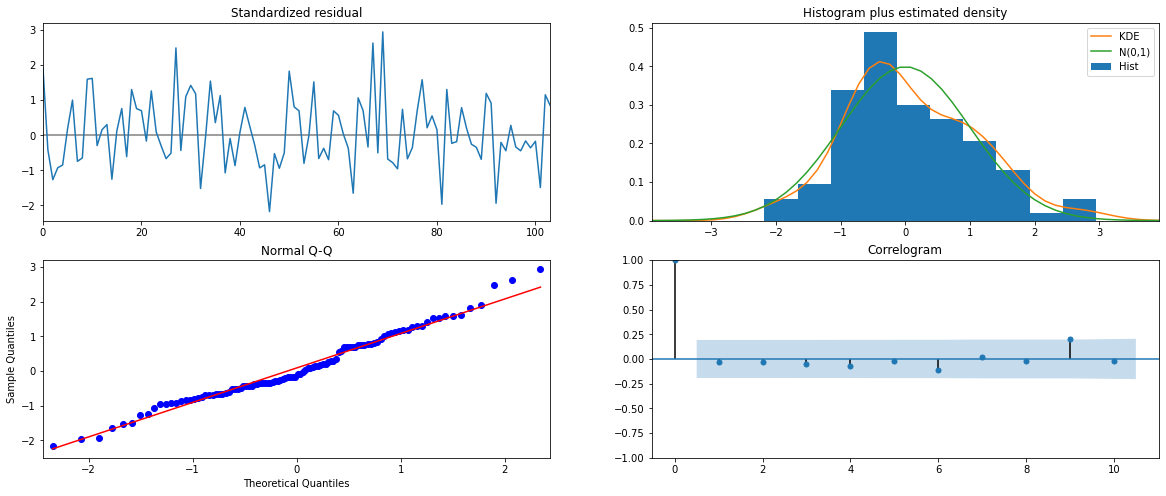

In [1085]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

#### Predict on the Test Set using this model and evaluate the model.

In [1086]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [1087]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867264,15.928501,31.647976,94.086552
1,70.541190,16.147659,38.892360,102.190020
2,77.356411,16.147656,45.707586,109.005236
3,76.208814,16.147656,44.559989,107.857639
4,72.747398,16.147656,41.098573,104.396223


In [1088]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.992037799901425


In [1089]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",15.640811
"SARIMA(1,1,2)(2,0,2,6)",26.208445
"SARIMA(0,1,2)(2,0,2,12)",26.992038


Even with 12 months seasonality the RMSE did not improve.Still the RMSE of ARIMA model is the lowest.

#### 7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

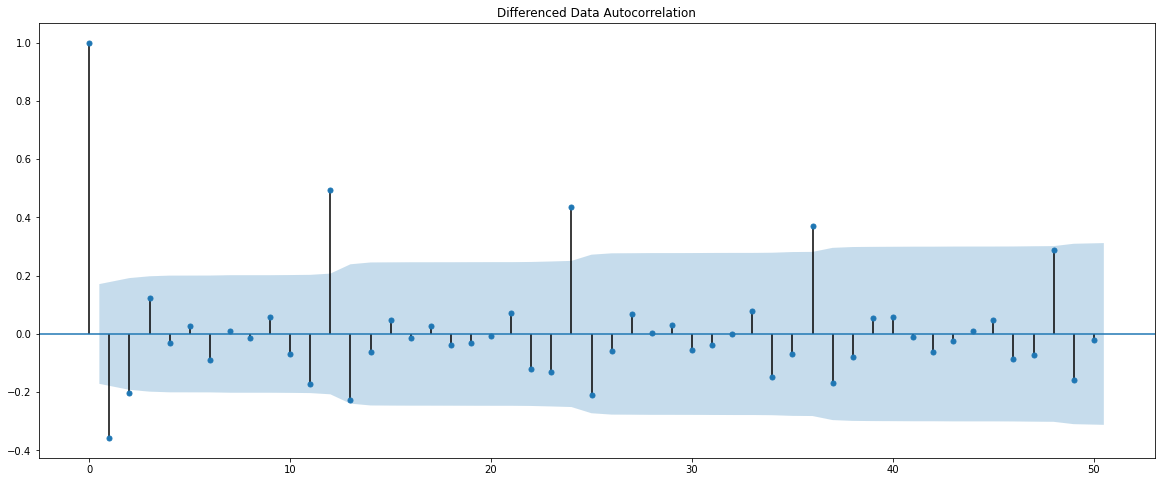

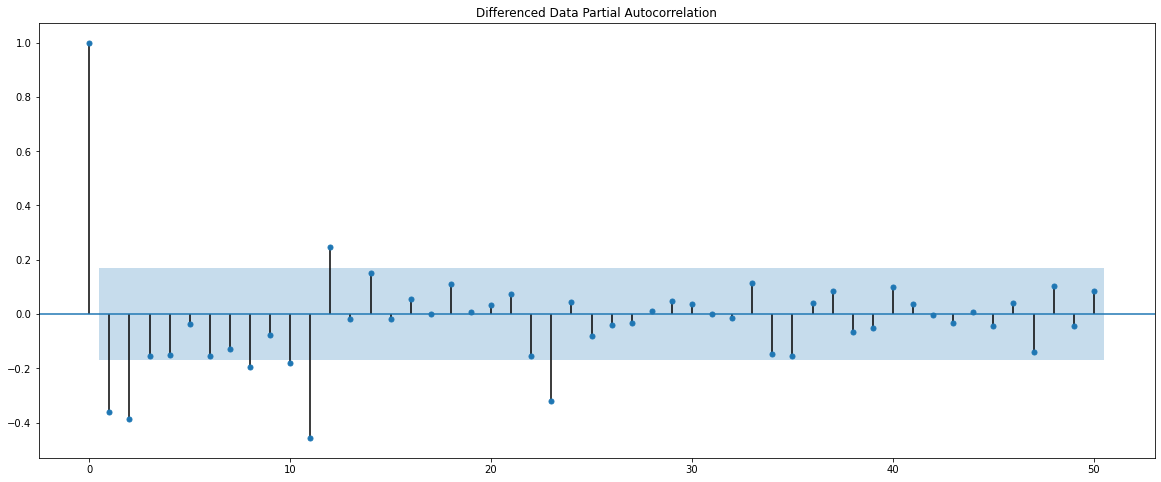

In [1090]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [1091]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sat, 12 Sep 2020   AIC                           1279.299
Time:                        18:11:38   BIC                           1296.550
Sample:                    02-29-1980   HQIC                          1286.309
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

#### Predict on the Test Set using this model and evaluate the model.

In [1092]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [1093]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.376559759557743


In [1094]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",15.640811
"SARIMA(1,1,2)(2,0,2,6)",26.208445
"SARIMA(0,1,2)(2,0,2,12)",26.992038
"ARIMA(2,1,2)",15.376560


#### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

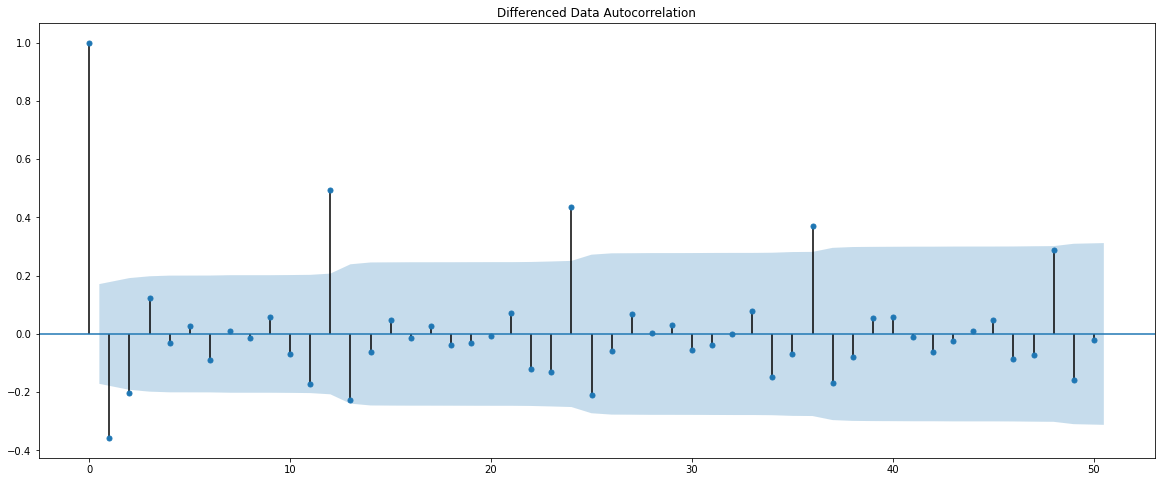

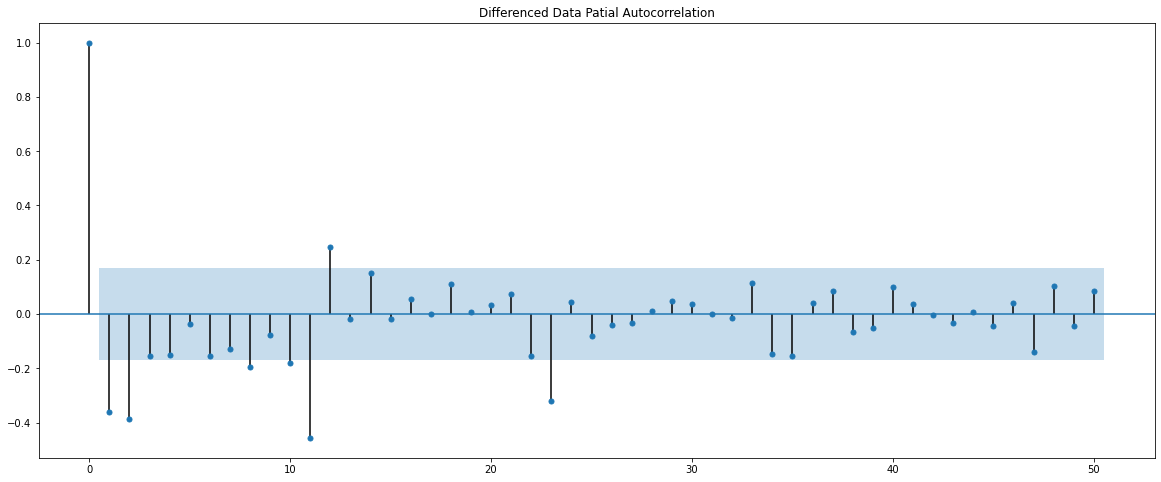

In [1095]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

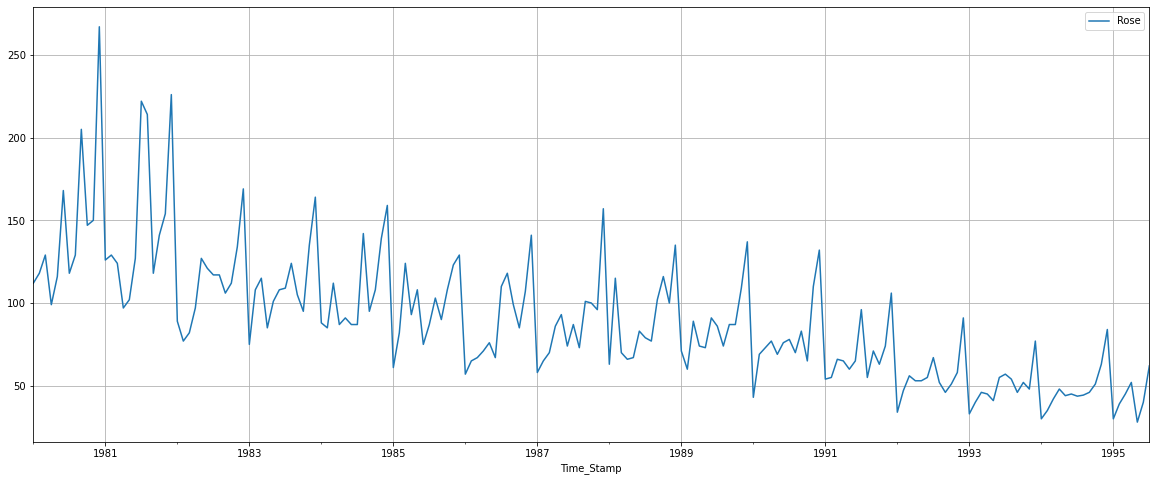

In [1096]:
df_rose.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

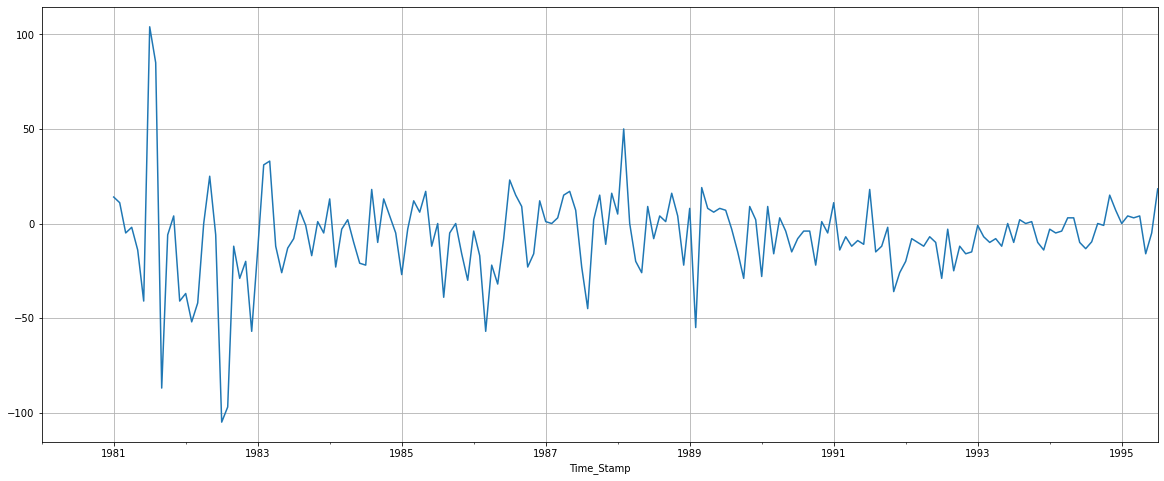

In [1097]:
(df_rose['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

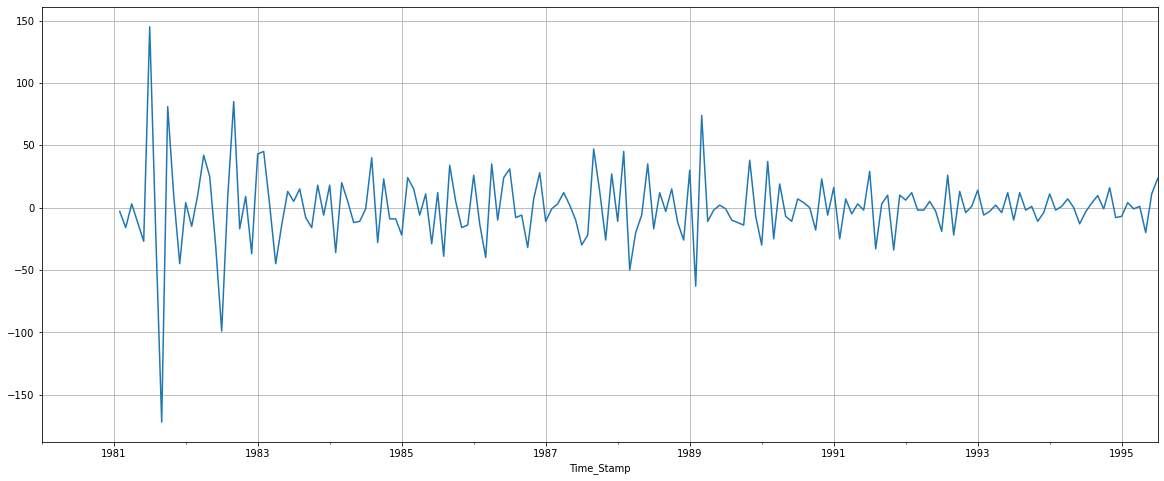

In [1098]:
(df_rose['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

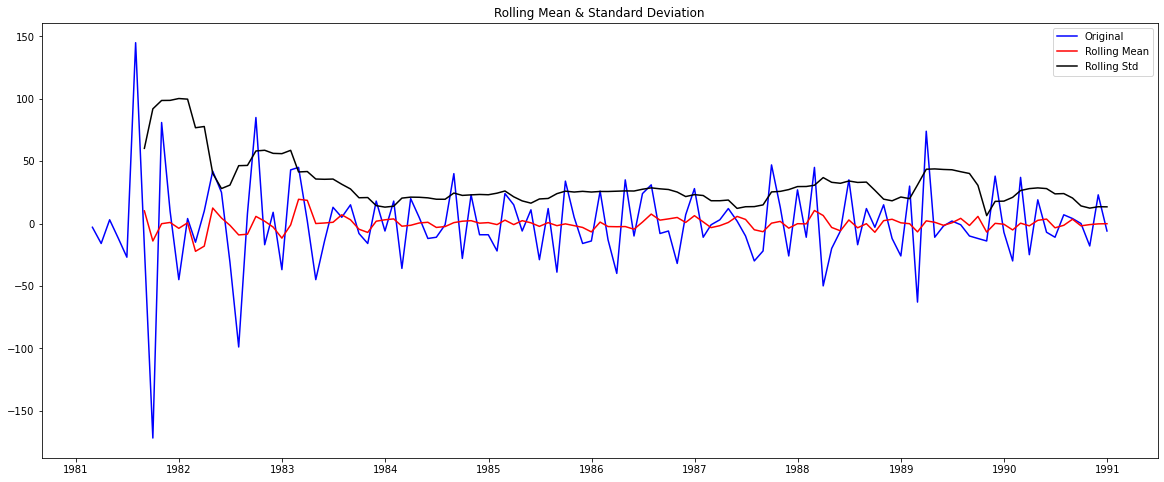

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [1099]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

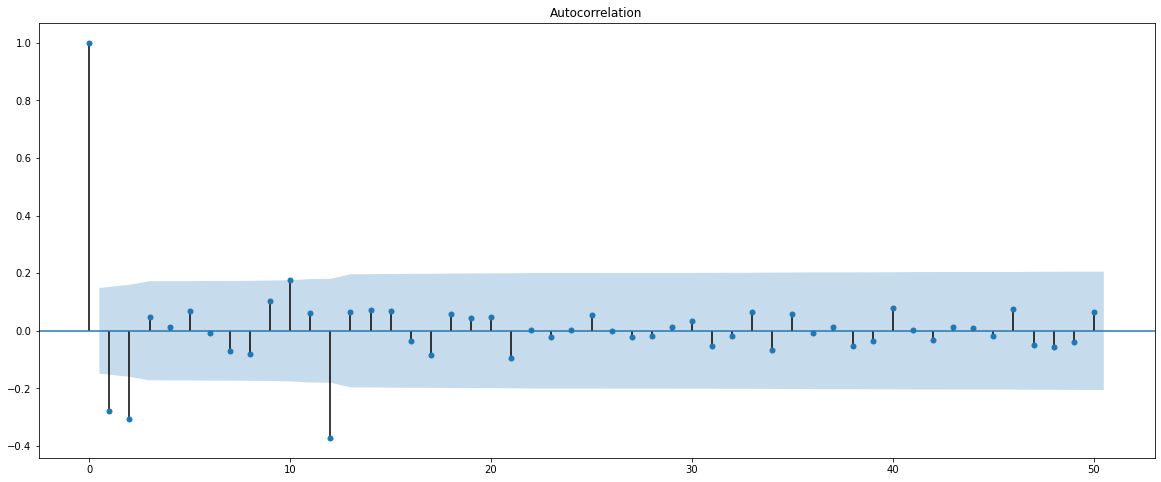

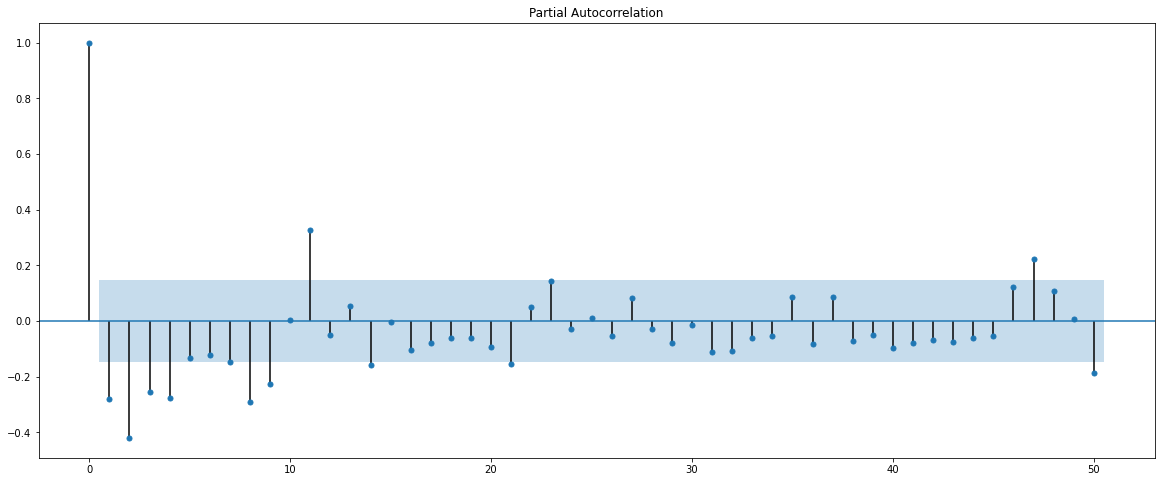

In [1100]:
plot_acf((df_rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df_rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=50);

In [1101]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -284.472
Date:                            Sat, 12 Sep 2020   AIC                            590.945
Time:                                    18:12:06   BIC                            615.520
Sample:                                         0   HQIC                           600.695
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9798      0.224     -4.365      0.000      -1.420      -0.540
ar.L2         -0.1274      0.143   

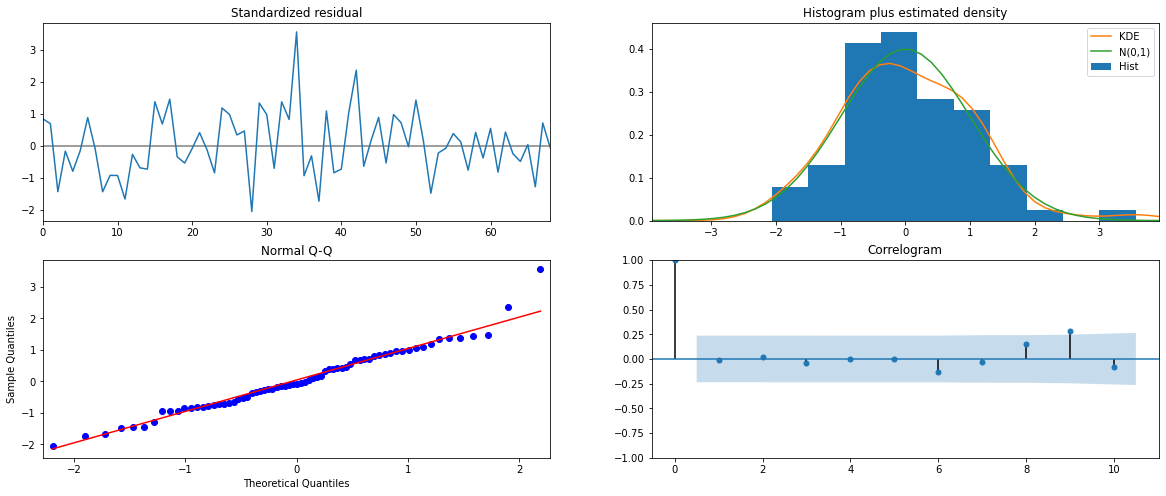

In [1102]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

#### Predict on the Test Set using this model and evaluate the model.

In [1103]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [1104]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,43.917419,14.046748,16.386300,71.448538
1,72.297725,14.055893,44.748680,99.846770
2,63.954754,14.045782,36.425526,91.483981
3,60.120041,14.229320,32.231087,88.008996
4,61.340132,14.220075,33.469297,89.210966


In [1105]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

17.400396287657113


#### 8.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [1106]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(4, 1, 2, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",15.640811
"SARIMA(1,1,2)(2,0,2,6)",26.208445
"SARIMA(0,1,2)(2,0,2,12)",26.992038
"ARIMA(2,1,2)",15.376560
"SARIMA(2,1,2)(4, 1, 2, 12)",17.400396


#### 9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Building the most optimum model on the Full Data.

The final model to be built on the whole data is the following:

* Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing	

In [941]:
fullmodel1 = ExponentialSmoothing(df_rose,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [942]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_rose['Rose'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df_rose['Rose'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 24.269360555759157 
MAPE: 16.65


In [1125]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

In [1126]:
prediction_1

1995-08-31    40.252169
1995-09-30    40.028660
1995-10-31    42.142329
1995-11-30    49.036892
1995-12-31    70.121220
1996-01-31    26.542414
1996-02-29    34.083516
1996-03-31    40.682647
1996-04-30    43.834855
1996-05-31    34.515663
1996-06-30    41.706780
1996-07-31    43.392558
Freq: M, dtype: float64

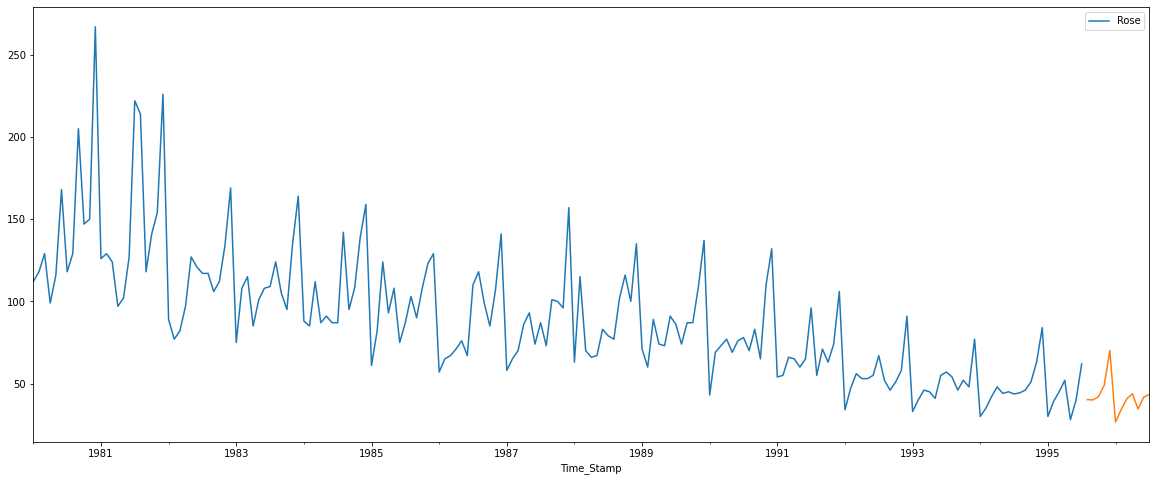

In [1127]:
df_rose.plot()
prediction_1.plot();

In [1128]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,11.635952,40.252169,104.575199
1995-09-30,11.412443,40.028660,104.351690
1995-10-31,13.526112,42.142329,106.465359
1995-11-30,20.420675,49.036892,113.359922
1995-12-31,41.505003,70.121220,134.444250


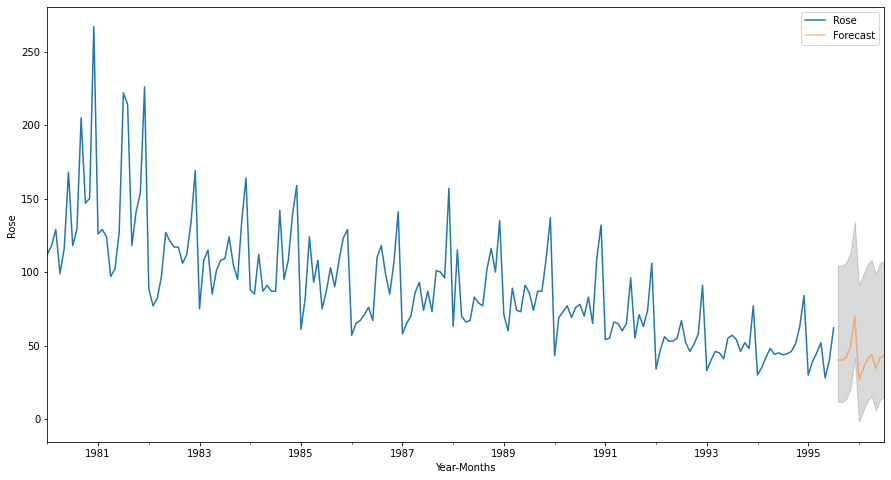

In [1129]:
# plot the forecast along with the confidence band

axis = df_rose.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

When we look at the predicted values with the respective confidence intervals, we see that even for a 95% confidence interval, the shaded area in the above graph (confidence interval) is quite high).

#### Building the SARIMAX model on full data

In [1114]:
full_data_model = sm.tsa.statespace.SARIMAX(df_rose['Rose'],
                                order=(2,1,2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Nimish\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -492.673
Date:                            Sat, 12 Sep 2020   AIC                           1007.346
Time:                                    18:42:00   BIC                           1038.369
Sample:                                01-31-1980   HQIC                          1019.948
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0106      0.106      9.572      0.000       0.804       1.218
ar.L2         -0.1716      0.113   

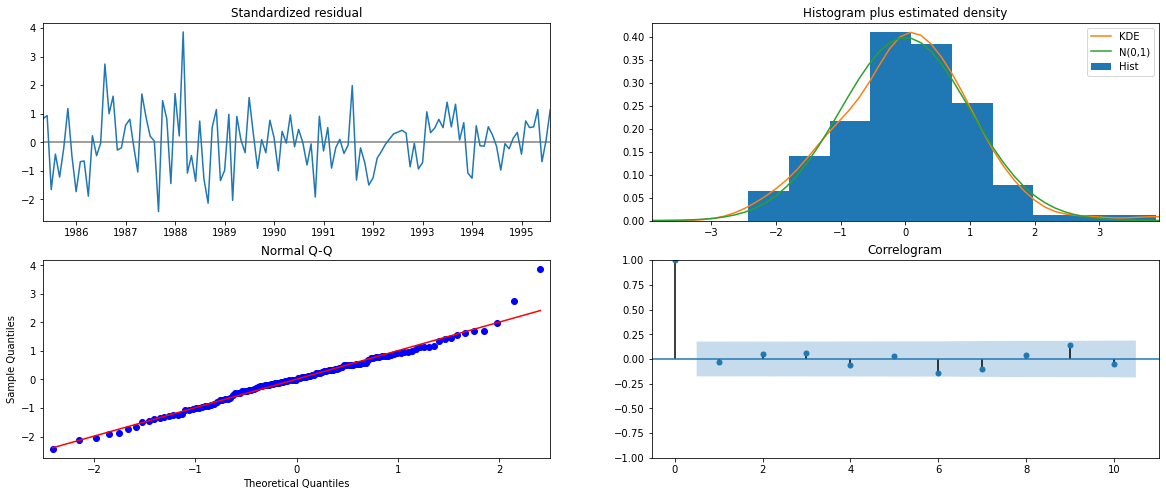

In [1115]:
results_full_data_model.plot_diagnostics();

#### Evaluate the model on the whole and predict 12 months into the future.

In [1116]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [1117]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,43.004576,12.438093,18.626363,67.382790
1995-09-30,44.202087,12.489003,19.724091,68.680084
1995-10-31,46.620060,12.495773,22.128794,71.111325
1995-11-30,59.149586,12.495669,34.658524,83.640648
1995-12-31,87.900879,12.510416,63.380915,112.420843


In [1118]:
rmse = mean_squared_error(df_rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 44.11374930656306


In [1119]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

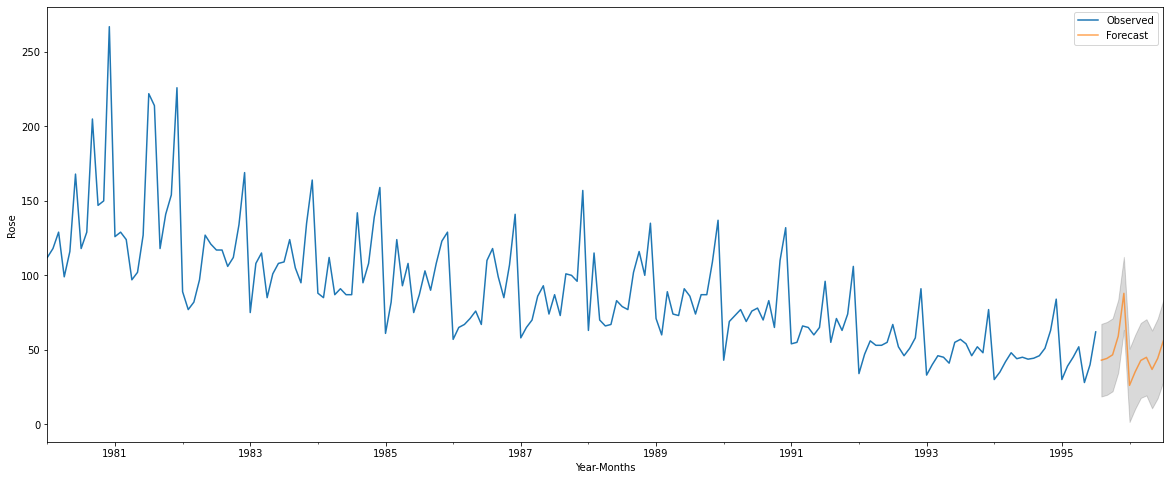

In [1120]:
# plot the forecast along with the confidence band

axis = df_rose['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

#### 10.Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.